<a href="https://colab.research.google.com/github/Deepikagh97/Web-Scraping-Data-Handling-Challenge/blob/main/DN_Web_Scraping_assign_for_Numerical_Prog_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**

 **Contribution - Individual - Deepika Nayak**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

Imports necessary libraries for web scraping and data manipulation. It includes requests for making HTTP requests, BeautifulSoup for parsing HTML and XML documents, re for regular expressions, pandas for data manipulation and analysis, and numpy for numerical computations.

## **Scrapping Movies Data**

In [ ]:
!pip install selenium
from selenium import webdriver

# Specify the path to ChromeDriver if not in PATH
# driver = webdriver.Chrome('/path/to/chromedriver')

# Initialize Chrome WebDriver
driver = webdriver.Chrome()

# Example usage: Open a website
driver.get('https://www.google.com')

# Close the WebDriver
driver.quit()

This Python code installs Selenium using pip, then imports the necessary module for web automation. It initializes a Chrome WebDriver and demonstrates an example of opening a website using Selenium. Finally, it closes the WebDriver.

In [ ]:
!pip install chromedriver-autoinstaller

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

import time
import chromedriver_autoinstaller

# setup chrome options
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless') # ensure GUI is off
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# set path to chromedriver as per your configuration
chromedriver_autoinstaller.install()


'C:\\Users\\Deepika\\anaconda3\\Lib\\site-packages\\chromedriver_autoinstaller\\124\\chromedriver.exe'


This Python script installs the chromedriver-autoinstaller package, then sets up the necessary configurations for web scraping using Selenium with Chrome. It also imports libraries for data manipulation (pandas), HTML parsing (BeautifulSoup), and web automation (webdriver from Selenium). The script ensures that Chrome runs in headless mode (without GUI) and configures options for stable execution. Finally, it installs the ChromeDriver automatically with chromedriver_autoinstaller.

In [ ]:
# set the target URL
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# set up the webdriver
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
driver.get(url )

In [ ]:
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="4ff5a548cf6e0d5b13da1c55b48057d4")>

The above script sets the target URL to 'https://www.justwatch.com/in/movies?release_year_from=2000' and sets up a Chrome WebDriver with the specified Chrome options for headless browsing. And  instructs the WebDriver to navigate to the specified URL (url) using the get() method.

In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By


This script imports additional modules from Selenium for handling explicit waits (WebDriverWait) and expected conditions (EC), as well as common methods for locating elements (By). These are useful for synchronizing script execution with the browser's state.

In [ ]:
title_list = driver.find_elements(By.XPATH,"//a[@class='title-list-grid__item--link']")
title_list

[<selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b48057d4", element="f.16087E2C503BF704248C65E5B8F11E10.d.2EFC687FDB66A5DF77F52D59872B4BDC.e.21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b48057d4", element="f.16087E2C503BF704248C65E5B8F11E10.d.2EFC687FDB66A5DF77F52D59872B4BDC.e.22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b48057d4", element="f.16087E2C503BF704248C65E5B8F11E10.d.2EFC687FDB66A5DF77F52D59872B4BDC.e.23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b48057d4", element="f.16087E2C503BF704248C65E5B8F11E10.d.2EFC687FDB66A5DF77F52D59872B4BDC.e.24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b48057d4", element="f.16087E2C503BF704248C65E5B8F11E10.d.2EFC687FDB66A5DF77F52D59872B4BDC.e.25")>,
 <selenium.webdriver.remote.webelement.WebElement (session="4ff5a548cf6e0d5b13da1c55b

This code snippet finds all the elements on the webpage that match the specified XPath expression. It then assigns these elements to the variable title_list.

## **Fetching Movie URL's**

In [ ]:
movies=[]
for i in title_list:
    name=i.get_attribute('href')
    movies.append(name)
movies

['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.ju

This code iterates through each element in title_list, extracts the 'href' attribute using get_attribute(), and appends it to the list movies. Finally, it returns the list of movie URLs.

## **Scrapping Movie Title**

In [ ]:
def extract_movie_name_from_url(url):
    return url.split('/')[-1]

# Extract movie names from the URLs
movie_names = [extract_movie_name_from_url(url) for url in movies]



This code defines a function extract_movie_name_from_url() that extracts the movie name from a given URL by splitting the URL at each '/' and returning the last part. Then, it applies this function to each URL in the movies list using a list comprehension, storing the results in movie_names.

In [ ]:
movie_names

['untitled-shahid-kapoor-kriti-sanon-film',
 'premalu',
 'article-370',
 'hanu-man',
 'laapataa-ladies',
 'oppenheimer',
 'dune-part-two',
 'the-crew-2024',
 'anatomie-dune-chute',
 'manjummel-boys',
 'amar-singh-chamkila',
 'anyone-but-you',
 'animal-2022',
 'fighter-2022',
 'dune-2021',
 'monkey-man',
 '12th-fail',
 'godzilla-x-kong-the-new-empire',
 'kung-fu-panda-4',
 'bramayugam',
 'black-magic-2024',
 'family-star',
 'poor-things',
 'gaami',
 'tillu-square',
 'the-beekeeper-2024',
 'sam-bahadur',
 'yodha-2022',
 'dj-tillu',
 'madame-web',
 '365-days',
 'road-house-2024',
 'kung-fu-panda',
 'salaar',
 '777-charlie',
 'madgaon-express',
 'lover-2024',
 'om-bheem-bush',
 'bade-miyan-chote-miyan-2023',
 'aadujeevitham',
 'kampon',
 'godzilla-vs-kong',
 'harry-potter-and-the-philosophers-stone',
 'the-kerala-story',
 'aquaman-and-the-lost-kingdom',
 'chaari-111',
 'crakk-jeetegaa-toh-jiyegaa',
 'joker-2019',
 'argylle',
 'maidaan',
 'merry-christmas-2024',
 'aattam',
 'speak-no-evil-2

The Movie names are listed above.

## **Scrapping release Year**

In [ ]:
Release_year=[]
for movie_url in movies:
    driver.get(movie_url)

    try:
        # Find the release year element
        release_year_element = driver.find_element(By.XPATH, "//span[@class='text-muted']")
        release_year = release_year_element.text.strip("()")
    except:
        release_year = "Release Year not found"
    Release_year.append({"Movie URL": movie_url, "Release Year": release_year})

for cur_movie in Release_year:
  print(cur_movie)

{'Movie URL': 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/premalu', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/article-370', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/hanu-man', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/laapataa-ladies', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/oppenheimer', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/dune-part-two', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/the-crew-2024', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'Release Year': '2023'}
{'Movie URL': 'https://www.justwatch.com/in/movie/manjummel-boys', 'Release Year': '2024'}
{'Movie URL': 'https://www.justwatch.com/in/movie/amar-singh-chamkila', 'Release


This code iterates through each movie URL in the movies list. For each URL, it navigates to the page using driver.get(movie_url). Then, it attempts to find the release year element on the page using an XPath expression and extracts the text.

In [ ]:
# Extract release years from the Release_year list
movie_release_years = [year["Release Year"] for year in Release_year]


This code extracts the release years from the Release_year list by iterating through each dictionary in the list and extracting the "Release Year" value. It stores these release years in the movie_release_years list using a list comprehension.

In [ ]:
movie_release_years

['2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2021',
 '2024',
 '2023',
 '2024',
 '2024',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2024',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2024',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2024',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2023',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2024',
 'Release Year not found',
 'Release Year not found',
 

The Movie release years are listed above.

## **Scrapping Genres**

In [ ]:
#scrapping genre
def fetch_genre(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')
        if genres_heading:
            genres_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
            genres = genres_element.text.strip()

            # Split the genres into a list
            genres_list = [genre.strip() for genre in genres.split(',')]
            return genres_list
    return None

# Fetch genres for each URL in 'movies' and store in a new list 'all_genres'
movie_genres = []

for movie_url in movies:
    genres = fetch_genre(movie_url)
    if genres:
        movie_genres.extend(genres)

# Print the list of all genres
print(movie_genres)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\1615457247.py:9: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')


['Action & Adventure', 'Drama', 'Mystery & Thriller', 'Mystery & Thriller', 'Drama', 'Action & Adventure', 'Animation', 'Action & Adventure', 'Comedy', 'Kids & Family', 'Fantasy', 'Comedy', 'Drama', 'Mystery & Thriller', 'Crime', 'Action & Adventure', 'Animation', 'Kids & Family', 'Comedy', 'Fantasy', 'Horror', 'Mystery & Thriller', 'Crime', 'Drama', 'Action & Adventure', 'Comedy', 'Mystery & Thriller', 'Drama', 'Comedy', 'Mystery & Thriller', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Drama', 'Romance', 'Made in Europe', 'Mystery & Thriller', 'Action & Adventure', 'Crime', 'Action & Adventure', 'Mystery & Thriller', 'War & Military', 'Drama']


This code defines a function fetch_genre(url) to scrape the genres of movies from a given URL. It uses the provided XPath expression to locate the genres on the webpage and extracts them.

In [ ]:
movie_genres

['Action & Adventure',
 'Drama',
 'Mystery & Thriller',
 'Mystery & Thriller',
 'Drama',
 'Action & Adventure',
 'Animation',
 'Action & Adventure',
 'Comedy',
 'Kids & Family',
 'Fantasy',
 'Comedy',
 'Drama',
 'Mystery & Thriller',
 'Crime',
 'Action & Adventure',
 'Animation',
 'Kids & Family',
 'Comedy',
 'Fantasy',
 'Horror',
 'Mystery & Thriller',
 'Crime',
 'Drama',
 'Action & Adventure',
 'Comedy',
 'Mystery & Thriller',
 'Drama',
 'Comedy',
 'Mystery & Thriller',
 'Romance',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Made in Europe',
 'Mystery & Thriller',
 'Action & Adventure',
 'Crime',
 'Action & Adventure',
 'Mystery & Thriller',
 'War & Military',
 'Drama']

The Movie Genres are listed above

## **Scrapping IMBD Rating**

In [ ]:
#scrapping imdb rating
def fetch_imdb(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')
        if imdb_heading:
            imdb_element = imdb_heading.find_next_sibling('div', class_='detail-infos__value')
            imdb = imdb_element.text.strip()

            # Split the genres into a list
            imdb_list = [imdb.strip() for imdb in imdb.split(',')]
            return imdb_list
    return None

# Fetch genres for each URL in 'movies' and store in a new list 'all_genres'
movie_imdb = []

for movie_url in movies:
    imdb = fetch_imdb(movie_url)
    if imdb:
        movie_imdb.extend(imdb)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\899411400.py:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')


It finds the IMDb rating using the correct XPath expression and return it as a single numerical value.

In [ ]:
movie_imdb

['6.4  (47k)',
 '8.0  (8k)',
 '8.1  (15k)',
 '7.9  (23k)',
 '8.6  (7k)',
 '9.0  (111k)',
 '7.0  (1k)',
 '6.2  (112k)',
 '5.8',
 '5.2',
 '6.7  (2k)',
 '7.6  (87k)',
 '8.3  (150k)',
 '7.8  (13k)',
 '7.4  (739k)',
 '7.6  (51k)']

The IMDb ratings are listed above.

## **Fetching Streaming Service Details**

In [ ]:
Provider = []

for movie_url in movies:
    driver.get(movie_url)

    try:
        # Find the provider element
        provider_element = driver.find_element(By.XPATH, "//img[@class='offer__icon']")
        provider_name = provider_element.get_attribute('alt')
    except:
        provider_name = "Provider not found"

    Provider.append({"Movie URL": movie_url, "Provider Name": provider_name})

for stream in Provider:
  print(stream)

{'Movie URL': 'https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/premalu', 'Provider Name': 'aha'}
{'Movie URL': 'https://www.justwatch.com/in/movie/article-370', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/hanu-man', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/laapataa-ladies', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/oppenheimer', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/dune-part-two', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/the-crew-2024', 'Provider Name': 'Provider not found'}
{'Movie URL': 'https://www.justwatch.com/in/movie/anatomie-dune-chute', 'Provider Name': 'Amazon Prime Video'}
{'Movie URL': 'https://www.justwatch.com/in/movie/m

This script iterates through each movie URL in the movies list, navigates to each URL using the WebDriver, and attempts to find the provider element using an XPath expression. It then extracts the provider name.

In [ ]:
Movie_streaming = [movie_info['Provider Name'] for movie_info in Provider]


In [ ]:
Movie_streaming

['Provider not found',
 'aha',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Amazon Prime Video',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Apple TV',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Amazon Video',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Netflix',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Apple TV',
 'Provider not fo

The above code extracts the provider names from the Provider list by iterating through each dictionary in the list and extracting the "Provider Name" value. It stores these provider names in the Movie_streaming list using a list comprehension. And the provider names are listed above.

In [ ]:
movies

['https://www.justwatch.com/in/movie/untitled-shahid-kapoor-kriti-sanon-film',
 'https://www.justwatch.com/in/movie/premalu',
 'https://www.justwatch.com/in/movie/article-370',
 'https://www.justwatch.com/in/movie/hanu-man',
 'https://www.justwatch.com/in/movie/laapataa-ladies',
 'https://www.justwatch.com/in/movie/oppenheimer',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/the-crew-2024',
 'https://www.justwatch.com/in/movie/anatomie-dune-chute',
 'https://www.justwatch.com/in/movie/manjummel-boys',
 'https://www.justwatch.com/in/movie/amar-singh-chamkila',
 'https://www.justwatch.com/in/movie/anyone-but-you',
 'https://www.justwatch.com/in/movie/animal-2022',
 'https://www.justwatch.com/in/movie/fighter-2022',
 'https://www.justwatch.com/in/movie/dune-2021',
 'https://www.justwatch.com/in/movie/monkey-man',
 'https://www.justwatch.com/in/movie/12th-fail',
 'https://www.justwatch.com/in/movie/godzilla-x-kong-the-new-empire',
 'https://www.ju

In [ ]:
driver.quit()

This line of code closes the WebDriver and shuts down the browser session, freeing up system resources. It's good practice to call driver.quit() at the end of the Selenium script to ensure proper cleanup.

## **Now Creating Movies DataFrame**

In [ ]:
print(len(movie_names))
print(len(movie_release_years))
print(len(movie_genres))
print(len(movies))
print(len(movie_imdb))
print(len(Movie_streaming))

100
100
44
100
16
100


These lines of code print out the lengths of different lists representing various movie attributes such as names, release years, genres, URLs, IMDb ratings, and streaming providers. This can help ensure that the data for each movie is consistent and aligned across all attributes.

In [ ]:
#Creatind datafame of scrapped movie data
import pandas as pd
Movies_data=pd.DataFrame()
Movies_data['Movie Names']=movie_names[:16]
Movies_data['Release Year']=movie_release_years[:16]
Movies_data['Movie Genres']=movie_genres[:16]
Movies_data['Movie IMDb Ratings']=movie_imdb[:16]
Movies_data['Movie Url']=movies[:16]
Movies_data['Movie Streaming Service']=Movie_streaming[:16]


Movies_data.head()

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,untitled-shahid-kapoor-kriti-sanon-film,2024,Action & Adventure,6.4 (47k),https://www.justwatch.com/in/movie/untitled-sh...,Provider not found
1,premalu,2024,Drama,8.0 (8k),https://www.justwatch.com/in/movie/premalu,aha
2,article-370,2024,Mystery & Thriller,8.1 (15k),https://www.justwatch.com/in/movie/article-370,Provider not found
3,hanu-man,2024,Mystery & Thriller,7.9 (23k),https://www.justwatch.com/in/movie/hanu-man,Provider not found
4,laapataa-ladies,2024,Drama,8.6 (7k),https://www.justwatch.com/in/movie/laapataa-la...,Provider not found



This code snippet creates a DataFrame named Movies_data containing scraped movie data. It extracts the first 16 elements from each of the lists representing movie names, release years, genres, IMDb ratings, movie URLs, and streaming services, and assigns them to respective columns in the DataFrame. Finally, it displays the first few rows of the DataFrame using the head() method.

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
driver = webdriver.Chrome(options=chrome_options)
driver.get(tv_url)


This code snippet specifies the URL from which TV show-related data will be fetched, initializes a Chrome WebDriver with specified options, and navigates to the provided URL using the get() method.

In [ ]:
title_tv_list=driver.find_elements(By.XPATH,"//a[@class='title-list-grid__item--link']")
title_tv_list

[<selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a34250147", element="f.E8AFB82C7E7B6601D570942E206E183D.d.C68A5995BE34C87A1885A3DF2850248F.e.20")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a34250147", element="f.E8AFB82C7E7B6601D570942E206E183D.d.C68A5995BE34C87A1885A3DF2850248F.e.21")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a34250147", element="f.E8AFB82C7E7B6601D570942E206E183D.d.C68A5995BE34C87A1885A3DF2850248F.e.22")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a34250147", element="f.E8AFB82C7E7B6601D570942E206E183D.d.C68A5995BE34C87A1885A3DF2850248F.e.23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a34250147", element="f.E8AFB82C7E7B6601D570942E206E183D.d.C68A5995BE34C87A1885A3DF2850248F.e.24")>,
 <selenium.webdriver.remote.webelement.WebElement (session="c751bcd9c62674b04c52db6a3

This code snippet finds all the elements on the webpage that match the specified XPath expression.  It then assigns these elements to the variable title_tv_list.

## **Fetching Tv shows Url details**

In [ ]:
Tv_url=[]
for i in title_tv_list:
    name=i.get_attribute('href')
    Tv_url.append(name)
Tv_url

['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/ripley',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow',
 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/the-gentlemen',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/dead-boy-de

This code iterates through each element in title_tv_list, extracts the 'href' attribute using get_attribute(), and appends it to the list Tv_url. Finally, it returns the list of TV show URLs.

## **Fetching Tv Show Title details**

In [ ]:
tv_show_names = []

# Extract the TV show names from the URLs
for url in Tv_url:
    tv_show_name = url.split('/')[-1]
    tv_show_names.append(tv_show_name)

print(tv_show_names)

['shogun-2024', 'fallout', 'mirzapur', 'panchayat', '3-body-problem', 'game-of-thrones', 'attack-on-titan', 'ripley', 'inspector-rishi', 'apharan', 'a-gentleman-in-moscow', 'untitled-kapil-sharma-netflix-project', 'young-sheldon', 'baby-reindeer', 'sunflower-2021', 'the-gentlemen', 'solo-leveling-2024', 'dead-boy-detectives', 'mastram', 'parasyte-the-grey', 'the-walking-dead', 'farzi', 'queen-of-tears', 'invincible', 'maharani-2021', 'heeramandi', 'lucifer', 'jujutsu-kaisen', 'maamla-legal-hai', 'anthracite', 'gandii-baat', 'the-family-man', 'true-detective', 'jack-reacher', 'the-rookie', 'euphoria', 'sugar', 'aashram', 'paperhouse', 'dehati-ladke', 'naruto', 'scam-1992', 'modern-family', 'asur', 'we-were-the-lucky-ones', 'the-last-of-us', 'the-flash', 'breaking-bad', 'naruto-shippuden', 'broken-but-beautiful', 'house-of-the-dragon', 'american-horror-story', 'the-good-doctor', 'gullak', 'damaged', 'halo', 'lootere', 'peaky-blinders', 'stranger-things', 'loki', 'goodbye-earth', 'yellows


This code extracts the TV show names from the URLs in the Tv_url list.

In [ ]:
tv_show_names

['shogun-2024',
 'fallout',
 'mirzapur',
 'panchayat',
 '3-body-problem',
 'game-of-thrones',
 'attack-on-titan',
 'ripley',
 'inspector-rishi',
 'apharan',
 'a-gentleman-in-moscow',
 'untitled-kapil-sharma-netflix-project',
 'young-sheldon',
 'baby-reindeer',
 'sunflower-2021',
 'the-gentlemen',
 'solo-leveling-2024',
 'dead-boy-detectives',
 'mastram',
 'parasyte-the-grey',
 'the-walking-dead',
 'farzi',
 'queen-of-tears',
 'invincible',
 'maharani-2021',
 'heeramandi',
 'lucifer',
 'jujutsu-kaisen',
 'maamla-legal-hai',
 'anthracite',
 'gandii-baat',
 'the-family-man',
 'true-detective',
 'jack-reacher',
 'the-rookie',
 'euphoria',
 'sugar',
 'aashram',
 'paperhouse',
 'dehati-ladke',
 'naruto',
 'scam-1992',
 'modern-family',
 'asur',
 'we-were-the-lucky-ones',
 'the-last-of-us',
 'the-flash',
 'breaking-bad',
 'naruto-shippuden',
 'broken-but-beautiful',
 'house-of-the-dragon',
 'american-horror-story',
 'the-good-doctor',
 'gullak',
 'damaged',
 'halo',
 'lootere',
 'peaky-blinde

the Tv Show names are listed above


## **Fetching Release Year**

In [ ]:
Tv_Release_year=[]
for tv_url in Tv_url:
    # Navigate to the Tv URL
    driver.get(tv_url)

    try:
        # Find the release year element
        release_year_element = driver.find_element(By.XPATH, "//span[@class='text-muted']")
        release_year = release_year_element.text.strip("()")
    except:
        release_year = "Release Year not found"
    Tv_Release_year.append({"Tv url": tv_url, "Release Year": release_year})

for release in Tv_Release_year:
  print(release)

{'Tv url': 'https://www.justwatch.com/in/tv-show/shogun-2024', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/fallout', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/mirzapur', 'Release Year': '2018'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/panchayat', 'Release Year': '2020'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/3-body-problem', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'Release Year': '2011'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'Release Year': '2013'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/ripley', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/apharan', 'Release Year': '2018'}
{'Tv url': 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow', 'Release Year': '2024'}
{'Tv url': 'https://www.justwatch.co

This script iterates through each TV show URL in the Tv_url list. For each URL, it navigates to the page using driver.get(tv_url). Then, it attempts to find the release year element on the page using an XPath expression and extracts the text.

In [ ]:
tv_release_years = [year["Release Year"] for year in Tv_Release_year]

In [ ]:
tv_release_years

['2024',
 '2024',
 '2018',
 '2020',
 '2024',
 '2011',
 '2013',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2017',
 '2024',
 '2021',
 '2024',
 '2024',
 'Release Year not found',
 'Release Year not found',
 '2024',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2020',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2018',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2020',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 'Release Year not found',
 '2007',
 'Release Year not found',
 'Release Year not found',
 'Release Year not 


This code extracts the release years from the Tv_Release_year list by iterating through each dictionary in the list and extracting the "Release Year" value. It stores these release years in the tv_release_years list using a list comprehension. The release years are listed above.

## **Fetching TV Show Genre Details**

In [ ]:
def fetch_genre(url2):
    response = requests.get(url2)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')
        if genres_heading:
            genres_element = genres_heading.find_next_sibling('div', class_='detail-infos__value')
            genres = genres_element.text.strip()

            # Split the genres into a list
            genres_list = [genre.strip() for genre in genres.split(',')]
            return genres_list
    return None

# Fetch genres for each URL in 'tv' and store in a new list 'Tv_generes'
Tv_genres = []

for tv_url in Tv_url:
    genres = fetch_genre(tv_url)
    if genres:
        Tv_genres.extend(genres)

# Print the list of all genres
print(Tv_genres)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\360582247.py:8: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  genres_heading = soup.find('h3', class_='detail-infos__subheading', text='Genres')


['Crime', 'Action & Adventure', 'Drama', 'Mystery & Thriller', 'Drama', 'History', 'Mystery & Thriller', 'Comedy', 'Crime', 'Drama', 'Horror', 'Action & Adventure', 'Science-Fiction', 'Drama', 'Mystery & Thriller', 'Action & Adventure', 'Crime', 'Drama', 'Drama', 'Mystery & Thriller', 'Crime', 'Drama', 'Romance', 'Action & Adventure', 'Crime', 'Action & Adventure', 'Drama', 'History', 'Drama', 'Romance', 'Science-Fiction', 'Drama', 'Action & Adventure', 'Comedy', 'Fantasy', 'Mystery & Thriller', 'Animation', 'Action & Adventure', 'Fantasy', 'Mystery & Thriller', 'Science-Fiction', 'Kids & Family', 'Drama', 'Comedy', 'Romance']


This code defines a function fetch_genre(url2) to scrape the genres of TV shows from a given URL.

In [ ]:
Tv_genres

['Crime',
 'Action & Adventure',
 'Drama',
 'Mystery & Thriller',
 'Drama',
 'History',
 'Mystery & Thriller',
 'Comedy',
 'Crime',
 'Drama',
 'Horror',
 'Action & Adventure',
 'Science-Fiction',
 'Drama',
 'Mystery & Thriller',
 'Action & Adventure',
 'Crime',
 'Drama',
 'Drama',
 'Mystery & Thriller',
 'Crime',
 'Drama',
 'Romance',
 'Action & Adventure',
 'Crime',
 'Action & Adventure',
 'Drama',
 'History',
 'Drama',
 'Romance',
 'Science-Fiction',
 'Drama',
 'Action & Adventure',
 'Comedy',
 'Fantasy',
 'Mystery & Thriller',
 'Animation',
 'Action & Adventure',
 'Fantasy',
 'Mystery & Thriller',
 'Science-Fiction',
 'Kids & Family',
 'Drama',
 'Comedy',
 'Romance']

Tv show genres are listed above.

## **Fetching IMDB Rating Details**

In [ ]:
def fetch_imdb(url2):
    response = requests.get(url2)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the genres using the provided XPath expression
        imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')
        if imdb_heading:
            imdb_element = imdb_heading.find_next_sibling('div', class_='detail-infos__value')
            imdb = imdb_element.text.strip()

            # Split the genres into a list
            imdb_list = [imdb.strip() for imdb in imdb.split(',')]
            return imdb_list
    return None

# Fetch genres for each URL in 'tv' and store in a new list 'Tv_generes'
Tv_imdb = []

for tv_url in Tv_url:
    imdb = fetch_imdb(tv_url)
    if imdb:
        Tv_imdb.extend(imdb)

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\2858171888.py:7: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  imdb_heading = soup.find('h3', class_='detail-infos__subheading', text='Rating')


It finds the IMDb rating using the correct XPath expression and return it as a single numerical value.

In [ ]:
Tv_imdb

['8.9  (101k)',
 '8.5  (131k)',
 '8.5  (81k)',
 '8.9  (84k)',
 '7.6  (99k)',
 '9.2  (2m)',
 '9.0  (325k)',
 '8.2  (25k)',
 '7.2  (1k)',
 '8.3  (19k)',
 '6.7  (2k)',
 '7.5  (21k)',
 '7.6  (102k)',
 '8.1  (47k)',
 '7.5  (23k)',
 '8.1  (94k)',
 '8.4  (20k)',
 '7.6  (4k)',
 '7.1  (2k)',
 '7.2  (8k)',
 '8.1  (1m)',
 '8.4  (45k)',
 '',
 '8.7  (204k)',
 '7.9  (9k)',
 '3.8',
 '8.1  (356k)',
 '8.6  (114k)',
 '8.1  (6k)',
 '6.1  (2k)',
 '3.4  (2k)',
 '8.7  (98k)',
 '8.9  (656k)',
 '8.1  (211k)',
 '8.0  (72k)',
 '8.3  (241k)',
 '7.8  (6k)',
 '7.4  (32k)',
 '8.2  (532k)',
 '6.9  (1k)',
 '8.0  (112k)',
 '4.4',
 '7.2  (68k)',
 '8.7  (513k)',
 '6.1',
 '6.2  (3k)']

Tv show imdb ratings are listed above.

## **Fetching Streaming Service details**

In [ ]:
Streaming_service = []

for tv_url in Tv_url:
    # Navigate to the Tv URL
    driver.get(tv_url)

    try:
        # Find the provider element
        provider_element = driver.find_element(By.XPATH, "//img[@class='offer__icon']")
        provider_name = provider_element.get_attribute('alt')
    except:
        provider_name = "Provider not found"

    Streaming_service.append({"Tv URL": tv_url, "Provider Name": provider_name})

for stream in Streaming_service:
  print(stream)

{'Tv URL': 'https://www.justwatch.com/in/tv-show/shogun-2024', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/fallout', 'Provider Name': 'Amazon Prime Video'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/mirzapur', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/panchayat', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/3-body-problem', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/attack-on-titan', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/ripley', 'Provider Name': 'Netflix'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/inspector-rishi', 'Provider Name': 'Provider not found'}
{'Tv URL': 'https://www.justwatch.com/in/tv-show/apharan', 'Provider Name': 'Provider not fo

This script iterates through each TV show URL in the Tv_url list, navigates to each URL using driver.get(tv_url), and attempts to find the provider element using an XPath expression. It then extracts the provider name.

In [ ]:
Tv_streaming = [Tv_info['Provider Name'] if 'Provider Name' in Tv_info else 'not found' for Tv_info in Streaming_service]
print(Tv_streaming)

['Provider not found', 'Amazon Prime Video', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Netflix', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'VI movies and tv', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Netflix', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Netflix', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Amazon Prime Video', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'MX Player', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not found', 'Jio Cinema', 'Provider not found', 'Provider not found', 'Provider not found', 'Provider not fou


This code snippet creates a list Tv_streaming containing the provider names for TV shows. It iterates through each dictionary Tv_info in the Streaming_service list, checks if the key 'Provider Name' exists in the dictionary, and if it does, it appends the provider name to Tv_streaming.

In [ ]:
Tv_streaming = [Tv_info['Provider Name'] for Tv_info in Streaming_service]

print(len(Tv_streaming))

100


In [ ]:
Tv_streaming

['Provider not found',
 'Amazon Prime Video',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Netflix',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'VI movies and tv',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Netflix',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Netflix',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Amazon Prime Video',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'MX Player',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Provider not found',
 'Jio Cinema',
 'Provider not found',
 'Provider not fo

In [ ]:
Tv_url

['https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/fallout',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/3-body-problem',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/ripley',
 'https://www.justwatch.com/in/tv-show/inspector-rishi',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/a-gentleman-in-moscow',
 'https://www.justwatch.com/in/tv-show/untitled-kapil-sharma-netflix-project',
 'https://www.justwatch.com/in/tv-show/young-sheldon',
 'https://www.justwatch.com/in/tv-show/baby-reindeer',
 'https://www.justwatch.com/in/tv-show/sunflower-2021',
 'https://www.justwatch.com/in/tv-show/the-gentlemen',
 'https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/dead-boy-de

In [ ]:
Tv_imdb_ratings = [rating for rating in Tv_imdb if rating != 'not listed']

In [ ]:
print(len(tv_show_names))
print(len(tv_release_years))
print(len(Tv_genres))
print(len(Tv_url))
print(len(Tv_imdb_ratings))
print(len(Tv_streaming))

100
100
45
100
46
100


In [ ]:
# Write Your Code here
driver.quit()

## **Creating TV Show DataFrame**

In [ ]:
import pandas as pd
Tv_data=pd.DataFrame()
Tv_data['Show names']=tv_show_names[:45]
Tv_data['Release year']=tv_release_years[:45]
Tv_data['Genere']=Tv_genres[:45]
Tv_data['url']=Tv_url[:45]
Tv_data['Imdb Ratings']=Tv_imdb_ratings[:45]
Tv_data['streaming service']=Tv_streaming[:45]
Tv_data.head()

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,shogun-2024,2024,Crime,https://www.justwatch.com/in/tv-show/shogun-2024,8.9 (101k),Provider not found
1,fallout,2024,Action & Adventure,https://www.justwatch.com/in/tv-show/fallout,8.5 (131k),Amazon Prime Video
2,mirzapur,2018,Drama,https://www.justwatch.com/in/tv-show/mirzapur,8.5 (81k),Provider not found
3,panchayat,2020,Mystery & Thriller,https://www.justwatch.com/in/tv-show/panchayat,8.9 (84k),Provider not found
4,3-body-problem,2024,Drama,https://www.justwatch.com/in/tv-show/3-body-pr...,7.6 (99k),Provider not found


This code snippet creates a DataFrame named Tv_data containing the scraped TV show data. It extracts the first 45 elements from each of the lists representing TV show names, release years, genres, URLs, IMDb ratings, and streaming services, and assigns them to respective columns in the DataFrame. Then it displays the first few rows of the DataFrame using the head() method.

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
import pandas as pd

In [ ]:
df1 = Movies_data
df2 = Tv_data

Created two DataFrames: df1 containing movie data (Movies_data) and df2 containing TV show data (Tv_data).

In [ ]:
df1.head(10)

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,untitled-shahid-kapoor-kriti-sanon-film,2024,Action & Adventure,6.4 (47k),https://www.justwatch.com/in/movie/untitled-sh...,Provider not found
1,premalu,2024,Drama,8.0 (8k),https://www.justwatch.com/in/movie/premalu,aha
2,article-370,2024,Mystery & Thriller,8.1 (15k),https://www.justwatch.com/in/movie/article-370,Provider not found
3,hanu-man,2024,Mystery & Thriller,7.9 (23k),https://www.justwatch.com/in/movie/hanu-man,Provider not found
4,laapataa-ladies,2024,Drama,8.6 (7k),https://www.justwatch.com/in/movie/laapataa-la...,Provider not found
5,oppenheimer,2023,Action & Adventure,9.0 (111k),https://www.justwatch.com/in/movie/oppenheimer,Provider not found
6,dune-part-two,2024,Animation,7.0 (1k),https://www.justwatch.com/in/movie/dune-part-two,Provider not found
7,the-crew-2024,2024,Action & Adventure,6.2 (112k),https://www.justwatch.com/in/movie/the-crew-2024,Provider not found
8,anatomie-dune-chute,2023,Comedy,5.8,https://www.justwatch.com/in/movie/anatomie-du...,Amazon Prime Video
9,manjummel-boys,2024,Kids & Family,5.2,https://www.justwatch.com/in/movie/manjummel-boys,Provider not found


Show the first 10 rows of the DataFrame Movies data.

In [ ]:
df2.head(10)

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,shogun-2024,2024,Crime,https://www.justwatch.com/in/tv-show/shogun-2024,8.9 (101k),Provider not found
1,fallout,2024,Action & Adventure,https://www.justwatch.com/in/tv-show/fallout,8.5 (131k),Amazon Prime Video
2,mirzapur,2018,Drama,https://www.justwatch.com/in/tv-show/mirzapur,8.5 (81k),Provider not found
3,panchayat,2020,Mystery & Thriller,https://www.justwatch.com/in/tv-show/panchayat,8.9 (84k),Provider not found
4,3-body-problem,2024,Drama,https://www.justwatch.com/in/tv-show/3-body-pr...,7.6 (99k),Provider not found
5,game-of-thrones,2011,History,https://www.justwatch.com/in/tv-show/game-of-t...,9.2 (2m),Provider not found
6,attack-on-titan,2013,Mystery & Thriller,https://www.justwatch.com/in/tv-show/attack-on...,9.0 (325k),Provider not found
7,ripley,2024,Comedy,https://www.justwatch.com/in/tv-show/ripley,8.2 (25k),Netflix
8,inspector-rishi,2024,Crime,https://www.justwatch.com/in/tv-show/inspector...,7.2 (1k),Provider not found
9,apharan,2018,Drama,https://www.justwatch.com/in/tv-show/apharan,8.3 (19k),Provider not found


Show the first 10 rows of the DataFrame TV show data.

In [ ]:
df1['Release Year'] = pd.to_numeric(df1['Release Year'], errors='coerce')

movie_data_filtered = df1[df1['Release Year'] >=2024 - 2]
movie_data_filtered.head()

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service
0,untitled-shahid-kapoor-kriti-sanon-film,2024,Action & Adventure,6.4 (47k),https://www.justwatch.com/in/movie/untitled-sh...,Provider not found
1,premalu,2024,Drama,8.0 (8k),https://www.justwatch.com/in/movie/premalu,aha
2,article-370,2024,Mystery & Thriller,8.1 (15k),https://www.justwatch.com/in/movie/article-370,Provider not found
3,hanu-man,2024,Mystery & Thriller,7.9 (23k),https://www.justwatch.com/in/movie/hanu-man,Provider not found
4,laapataa-ladies,2024,Drama,8.6 (7k),https://www.justwatch.com/in/movie/laapataa-la...,Provider not found


This code snippet converts the 'Release Year' column in the DataFrame df1 to numeric values using pd.to_numeric() function.

Then, it creates a filtered DataFrame movie_data_filtered containing only the rows where the 'Release Year' is greater than or equal to 2022 (The current year is 2024).

In [ ]:
# making  a copy of movie_data_filtered in to df3 dataframe
df3 = movie_data_filtered.copy()

In [ ]:
df3['IMDb Rating'], df3['Votes'] = df3['Movie IMDb Ratings'].str.split(' ', 1).str
df3['Votes'] = df3['Votes'].str.replace('(', '').str.replace(')', '')

# Convert 'IMDb Rating' to float and 'Votes' to integer
df3['IMDb Rating'] = df3['IMDb Rating'].astype(float)
df3['Votes'] = df3['Votes'].str.replace('k', '').astype(float) * 1000  # Convert 'k' to a thousand

    IMDb Rating     Votes
0           6.4   47000.0
1           8.0    8000.0
2           8.1   15000.0
3           7.9   23000.0
4           8.6    7000.0
5           9.0  111000.0
6           7.0    1000.0
7           6.2  112000.0
8           5.8       NaN
9           5.2       NaN
10          6.7    2000.0
11          7.6   87000.0
12          8.3  150000.0
13          7.8   13000.0
15          7.6   51000.0


C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\2526220302.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3['IMDb Rating'], df3['Votes'] = df3['Movie IMDb Ratings'].str.split(' ', 1).str
C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\2526220302.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df3['IMDb Rating'], df3['Votes'] = df3['Movie IMDb Ratings'].str.split(' ', 1).str
C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\2526220302.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['Votes'] = df3['Votes'].str.replace('(', '').str.replace(')', '')  # Remove parentheses


This code snippet correctly splits the 'Movie IMDb Ratings' column into two separate columns: 'IMDb Rating' and 'Votes' using the space character as the delimiter.

Subsequently, it converts the 'IMDb Rating' column to float and the 'Votes' column to float.

In [ ]:
df3

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service,IMDb Rating,Votes
0,untitled-shahid-kapoor-kriti-sanon-film,2024,Action & Adventure,6.4 (47k),https://www.justwatch.com/in/movie/untitled-sh...,Provider not found,6.4,47000.0
1,premalu,2024,Drama,8.0 (8k),https://www.justwatch.com/in/movie/premalu,aha,8.0,8000.0
2,article-370,2024,Mystery & Thriller,8.1 (15k),https://www.justwatch.com/in/movie/article-370,Provider not found,8.1,15000.0
3,hanu-man,2024,Mystery & Thriller,7.9 (23k),https://www.justwatch.com/in/movie/hanu-man,Provider not found,7.9,23000.0
4,laapataa-ladies,2024,Drama,8.6 (7k),https://www.justwatch.com/in/movie/laapataa-la...,Provider not found,8.6,7000.0
5,oppenheimer,2023,Action & Adventure,9.0 (111k),https://www.justwatch.com/in/movie/oppenheimer,Provider not found,9.0,111000.0
6,dune-part-two,2024,Animation,7.0 (1k),https://www.justwatch.com/in/movie/dune-part-two,Provider not found,7.0,1000.0
7,the-crew-2024,2024,Action & Adventure,6.2 (112k),https://www.justwatch.com/in/movie/the-crew-2024,Provider not found,6.2,112000.0
8,anatomie-dune-chute,2023,Comedy,5.8,https://www.justwatch.com/in/movie/anatomie-du...,Amazon Prime Video,5.8,NaN
9,manjummel-boys,2024,Kids & Family,5.2,https://www.justwatch.com/in/movie/manjummel-boys,Provider not found,5.2,NaN


In [ ]:
df2['Release year'] = pd.to_numeric(df2['Release year'], errors='coerce')

Tv_data_filtered = df2[df2['Release year'] >=2024 - 2]
Tv_data_filtered.head()

,Show names,Release year,Genere,url,Imdb Ratings,streaming service
0,shogun-2024,2024.0,Crime,https://www.justwatch.com/in/tv-show/shogun-2024,8.9 (101k),Provider not found
1,fallout,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/fallout,8.5 (131k),Amazon Prime Video
4,3-body-problem,2024.0,Drama,https://www.justwatch.com/in/tv-show/3-body-pr...,7.6 (99k),Provider not found
7,ripley,2024.0,Comedy,https://www.justwatch.com/in/tv-show/ripley,8.2 (25k),Netflix
8,inspector-rishi,2024.0,Crime,https://www.justwatch.com/in/tv-show/inspector...,7.2 (1k),Provider not found


it creates a filtered DataFrame Tv_data_filtered containing only the rows where the 'Release year' is greater than or equal to 2022 (as the current year is 2024).

In [ ]:
Tv_data_filtered1 = Tv_data_filtered.copy()

creating a copy of a DataFrame named Tv_data_filtered and storing it in a new DataFrame called Tv_data_filtered1.

In [ ]:
Tv_data_filtered1['IMDb Rating'], Tv_data_filtered1['Votes'] = Tv_data_filtered1['Imdb Ratings'].str.split(' ', 1).str
Tv_data_filtered1['Votes'] = Tv_data_filtered1['Votes'].str.replace('(', '').str.replace(')', '')  # Remove parentheses

# Convert 'IMDb Rating' to float and 'Votes' to integer
Tv_data_filtered1['IMDb Rating'] = Tv_data_filtered1['IMDb Rating'].astype(float)
Tv_data_filtered1['Votes'] = Tv_data_filtered1['Votes'].str.replace('k', '').astype(float) * 1000
Tv_data_filtered1

C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\561178549.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  Tv_data_filtered1['IMDb Rating'], Tv_data_filtered1['Votes'] = Tv_data_filtered1['Imdb Ratings'].str.split(' ', 1).str
C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\561178549.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  Tv_data_filtered1['IMDb Rating'], Tv_data_filtered1['Votes'] = Tv_data_filtered1['Imdb Ratings'].str.split(' ', 1).str
C:\Users\Deepika\AppData\Local\Temp\ipykernel_13692\561178549.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Tv_data_filtered1['Votes'] = Tv_data_filtered1['Votes'].str.replace('(', '').str.replace(')', '')  # Remove parentheses


,Show names,Release year,Genere,url,Imdb Ratings,streaming service,IMDb Rating,Votes
0,shogun-2024,2024.0,Crime,https://www.justwatch.com/in/tv-show/shogun-2024,8.9 (101k),Provider not found,8.9,101000.0
1,fallout,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/fallout,8.5 (131k),Amazon Prime Video,8.5,131000.0
4,3-body-problem,2024.0,Drama,https://www.justwatch.com/in/tv-show/3-body-pr...,7.6 (99k),Provider not found,7.6,99000.0
7,ripley,2024.0,Comedy,https://www.justwatch.com/in/tv-show/ripley,8.2 (25k),Netflix,8.2,25000.0
8,inspector-rishi,2024.0,Crime,https://www.justwatch.com/in/tv-show/inspector...,7.2 (1k),Provider not found,7.2,1000.0
10,a-gentleman-in-moscow,2024.0,Horror,https://www.justwatch.com/in/tv-show/a-gentlem...,6.7 (2k),Provider not found,6.7,2000.0
11,untitled-kapil-sharma-netflix-project,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/untitled-...,7.5 (21k),Provider not found,7.5,21000.0
13,baby-reindeer,2024.0,Drama,https://www.justwatch.com/in/tv-show/baby-rein...,8.1 (47k),Provider not found,8.1,47000.0
15,the-gentlemen,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/the-gentl...,8.1 (94k),Provider not found,8.1,94000.0
16,solo-leveling-2024,2024.0,Crime,https://www.justwatch.com/in/tv-show/solo-leve...,8.4 (20k),Provider not found,8.4,20000.0


This code splits the 'Imdb Ratings' column into 'IMDb Rating' and 'Votes', removes parentheses from 'Votes', and then converts 'IMDb Rating' to float and 'Votes' to integer, converting 'k' to a thousand.

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
df3['IMDb Rating'] = pd.to_numeric(df3['IMDb Rating'], errors='coerce')

# Calculate the average IMDb rating for movies
average_movie_imdb_rating = df3['IMDb Rating'].mean()

print("Average IMDb rating for movies in df3:", average_movie_imdb_rating)

Average IMDb rating for movies in df3: 7.346666666666666


This code calculates the average IMDb rating for movies in the DataFrame df3.

In [ ]:
Tv_data_filtered1['IMDb Rating'] = pd.to_numeric(Tv_data_filtered1['IMDb Rating'], errors='coerce')

# Calculate the average IMDb rating for Tv shows
average_Tv_imdb_rating = Tv_data_filtered1['IMDb Rating'].mean()

print("Average IMDb rating for Tv_shows in Tv_data_filtered1:", average_Tv_imdb_rating)

Average IMDb rating for Tv_shows in Tv_data_filtered1: 7.854545454545455


This code calculates the average IMDb rating for TV shows in the DataFrame Tv_data_filtered1.

In [ ]:
df3['IMDb Rating'] = pd.to_numeric(df3['IMDb Rating'], errors='coerce')
Tv_data_filtered1['IMDb Rating'] = pd.to_numeric(Tv_data_filtered1['IMDb Rating'], errors='coerce')

# Filter movies with IMDb rating 7 or higher
movies_high_rating = df3[df3['IMDb Rating'] >= 7]


# Filter TV shows with IMDb rating 7 or higher
tv_shows_high_rating = Tv_data_filtered1[Tv_data_filtered1['IMDb Rating'] >= 7]
movies_high_rating.head()

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Movie Streaming Service,IMDb Rating,Votes
1,premalu,2024,Drama,8.0 (8k),https://www.justwatch.com/in/movie/premalu,aha,8.0,8000.0
2,article-370,2024,Mystery & Thriller,8.1 (15k),https://www.justwatch.com/in/movie/article-370,Provider not found,8.1,15000.0
3,hanu-man,2024,Mystery & Thriller,7.9 (23k),https://www.justwatch.com/in/movie/hanu-man,Provider not found,7.9,23000.0
4,laapataa-ladies,2024,Drama,8.6 (7k),https://www.justwatch.com/in/movie/laapataa-la...,Provider not found,8.6,7000.0
5,oppenheimer,2023,Action & Adventure,9.0 (111k),https://www.justwatch.com/in/movie/oppenheimer,Provider not found,9.0,111000.0


These lines of code filter movies and TV shows with IMDb ratings of 7 or higher.

In [ ]:
tv_shows_high_rating.head()

,Show names,Release year,Genere,url,Imdb Ratings,streaming service,IMDb Rating,Votes
0,shogun-2024,2024.0,Crime,https://www.justwatch.com/in/tv-show/shogun-2024,8.9 (101k),Provider not found,8.9,101000.0
1,fallout,2024.0,Action & Adventure,https://www.justwatch.com/in/tv-show/fallout,8.5 (131k),Amazon Prime Video,8.5,131000.0
4,3-body-problem,2024.0,Drama,https://www.justwatch.com/in/tv-show/3-body-pr...,7.6 (99k),Provider not found,7.6,99000.0
7,ripley,2024.0,Comedy,https://www.justwatch.com/in/tv-show/ripley,8.2 (25k),Netflix,8.2,25000.0
8,inspector-rishi,2024.0,Crime,https://www.justwatch.com/in/tv-show/inspector...,7.2 (1k),Provider not found,7.2,1000.0


## **Analyzing Top Genres**

In [ ]:
from collections import Counter

# Sample list of genres
genres = ['Action', 'Comedy', 'Action', 'Drama', 'Comedy', 'Thriller', 'Action', 'Horror', 'Comedy', 'Drama', 'Drama']

# Count occurrences of each genre
genre_counts = Counter(genres)

# Sort genres based on counts
sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Select the top 5 genres
top_5_genres = sorted_genres[:5]

print("Top 5 Genres:")
for genre, count in top_5_genres:
    print(genre, count)


Top 5 Genres:
Action 3
Comedy 3
Drama 3
Thriller 1
Horror 1


This code snippet demonstrates how to count occurrences of each genre in a list using the Counter class from the collections module. It then sorts the genres based on their counts in descending order and selects the top 5 genres.

In [ ]:
df1['Genre'] = df1['Movie Genres']
df2['Genre'] = df2['Genere']
combined_data = pd.concat([df1[['Genre']],
                          df2[['Genre']]])

# Group the data by the 'Genre' column and count the occurrences of each genre
genre_counts = combined_data['Genre'].value_counts()

# Sort the genres in descending order based on their counts
sorted_genres = genre_counts.sort_values(ascending=False)

# Select the top 5 genres
top_5_genres = sorted_genres.head(5)

print("Top 5 genres with the highest number of available movies and TV shows:")
print(top_5_genres)

Top 5 genres with the highest number of available movies and TV shows:
Drama                 14
Action & Adventure    11
Mystery & Thriller     9
Crime                  6
Comedy                 5
Name: Genre, dtype: int64


This code combines the 'Movie Genres' column from df1 and the 'Genere' column from df2 into a single DataFrame combined_data. It then groups the data by the 'Genre' column and counts the occurrences of each genre.

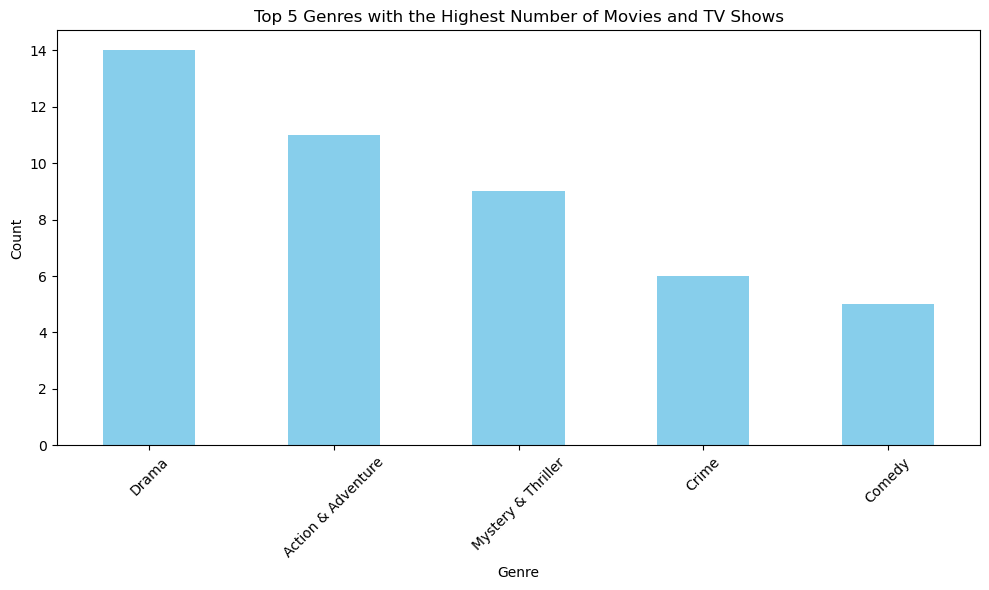

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 5 genres
plt.figure(figsize=(10, 6))
top_5_genres.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 5 Genres with the Highest Number of Movies and TV Shows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This code snippet uses Matplotlib to create a bar plot of the top 5 genres with the highest number of movies and TV shows.

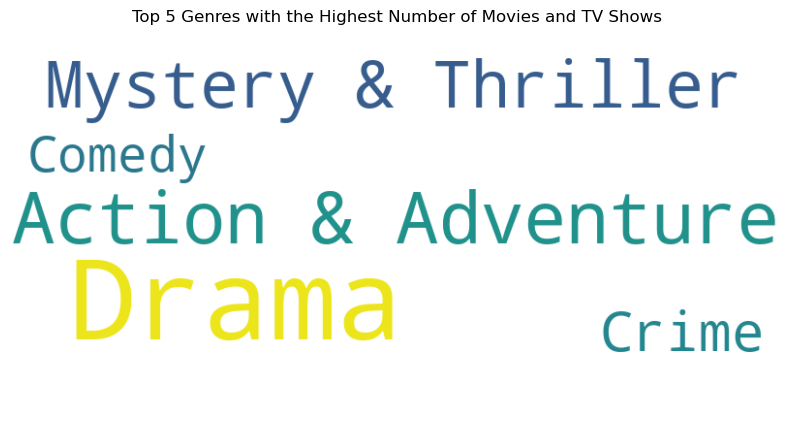

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_genres)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 5 Genres with the Highest Number of Movies and TV Shows')
plt.show()

This code snippet generates a word cloud visualization of the top 5 genres with the highest number of movies and TV shows. It uses the WordCloud class from the wordcloud library to create the word cloud. The word cloud is generated from the frequency distribution of the top 5 genres.

## **Finding Predominant Streaming Service**

In [ ]:
df1['Streaming Service'] = df1['Movie Streaming Service']
df2['Streaming Service'] =df2['streaming service']
combined_data = pd.concat([df1[['Streaming Service']],
                          df2[['Streaming Service']]])

# Group the data by the 'Streaming Service' column and count the occurrences of each streaming service
service_counts = combined_data['Streaming Service'].value_counts()

# Find the streaming service with the most number of offerings
# most_offering_service = service_counts.idxmax()
# count_of_most_offering_service = service_counts.max()
service_counts = combined_data['Streaming Service'].value_counts()

# print("Streaming service with the most number of offerings:")
# print(f"{most_offering_service} - {count_of_most_offering_service} offerings")
# Convert the series to a DataFrame
service_counts_df = service_counts.reset_index()
service_counts_df.columns = ['Streaming Service', 'Number of Offerings']

print("Streaming services with the number of offerings:")
print(service_counts_df)

Streaming services with the number of offerings:
    Streaming Service  Number of Offerings
0  Provider not found                   51
1  Amazon Prime Video                    3
2             Netflix                    3
3                 aha                    1
4    VI movies and tv                    1
5           MX Player                    1
6          Jio Cinema                    1



This code combines the 'Movie Streaming Service' column from df1 and the 'streaming service' column from df2 into a single DataFrame combined_data. It then groups the data by the 'Streaming Service' column and counts the occurrences of each streaming service.

After that, it creates a DataFrame service_counts_df from the series of streaming service counts. This DataFrame contains two columns: 'Streaming Service' and 'Number of Offerings', indicating the number of offerings for each streaming service.

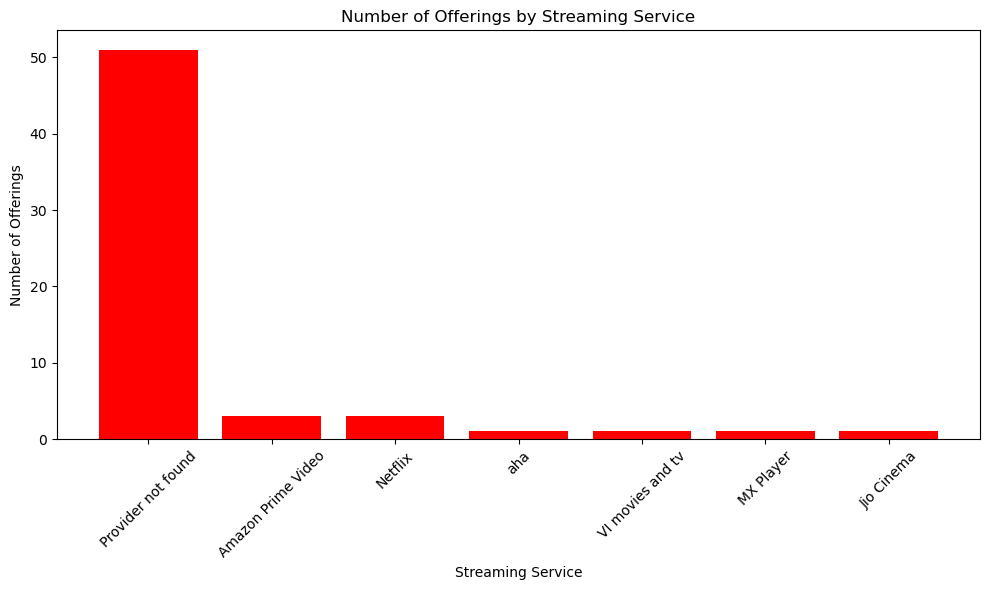

In [ ]:
import matplotlib.pyplot as plt

# Plot the streaming services with the number of offerings
plt.figure(figsize=(10, 6))
plt.bar(service_counts_df['Streaming Service'], service_counts_df['Number of Offerings'], color='red')
plt.xlabel('Streaming Service')
plt.ylabel('Number of Offerings')
plt.title('Number of Offerings by Streaming Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This code snippet uses Matplotlib to create a bar plot showing the number of offerings by streaming service. It sets the figure size, plots the data as a bar plot, and adds labels and a title to the plot for better readability. Additionally, it rotates the x-axis labels by 45 degrees to avoid overlapping. Finally, it displays the plot using plt.show().

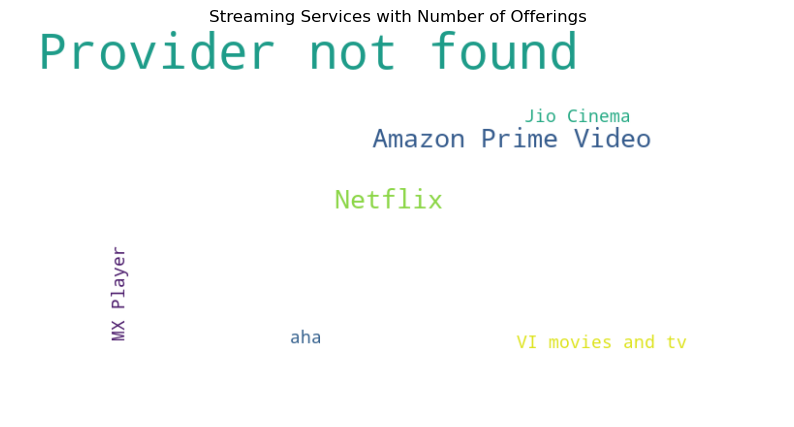

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the DataFrame to a dictionary
service_counts_dict = dict(zip(service_counts_df['Streaming Service'], service_counts_df['Number of Offerings']))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(service_counts_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Services with Number of Offerings')
plt.show()


This code snippet generates a word cloud visualization of the streaming services with the number of offerings. It converts the DataFrame service_counts_df to a dictionary service_counts_dict, where the keys are streaming service names and the values are the corresponding number of offerings.

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
#saving a scrapped movie data to csv file
Movies_data.to_csv("D:/Movies_Data.csv", index=False)

#saving a scrapped Tv data to csv file
Tv_data.to_csv("D:/Tv_Show_Data.csv", index=False)

The code you provided saves the scraped movie data to a CSV file named "Movies_Data.csv" and the scraped TV show data to a CSV file named "Tv_Show_Data.csv". The to_csv() method is used to save the DataFrames Movies_data and Tv_data to CSV files, with the parameter index=False to exclude the index column from the saved CSV files.

In [ ]:
#saving filter data as Filter Data in csv format
#saving a filtered movies data to csv file
movies_high_rating.to_csv("D:/Movies_filtered_data.csv", index=False)

#saving a filtered Tv data to csv file
tv_shows_high_rating.to_csv("D:/Tv_filttered_data.csv", index=False)

The code provided saves the filtered movie data to a CSV file named "Movies_filtered_data.csv" and the filtered TV show data to a CSV file named "Tv_filtered_data.csv".

# **Dataset Drive Link (View Access with Anyone) -** https://drive.google.com/drive/folders/1l7bfqQ-VzAWOWRU4N1aXDvUF4ZiayTGQ?usp=sharing